<a href="https://colab.research.google.com/github/fariha-sys/cognifyz/blob/main/cognifyz_level_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

number of rows:9551
number of columns:21
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to 

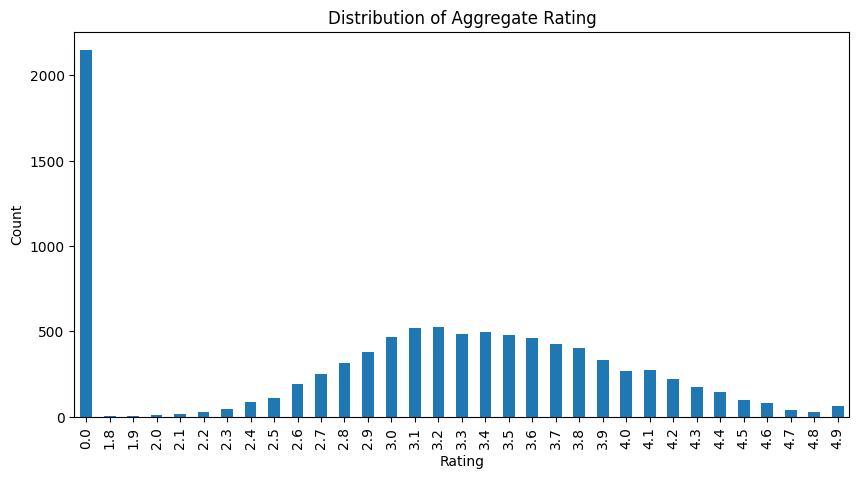

Aggregate rating
0.0    0.225110
1.8    0.000105
1.9    0.000210
2.0    0.000734
2.1    0.001572
2.2    0.002830
2.3    0.004926
2.4    0.009118
2.5    0.011528
2.6    0.020017
2.7    0.026200
2.8    0.033012
2.9    0.039929
3.0    0.049046
3.1    0.054391
3.2    0.054706
3.3    0.050618
3.4    0.051876
3.5    0.050304
3.6    0.047998
3.7    0.044750
3.8    0.041815
3.9    0.034794
4.0    0.027877
4.1    0.028715
4.2    0.023161
4.3    0.018235
4.4    0.014986
4.5    0.009956
4.6    0.008174
4.7    0.004297
4.8    0.002620
4.9    0.006393
Name: proportion, dtype: float64


In [6]:
#task 1(data exploration and preprocessing)
#Explore the dataset and identify the number of rows and columns.
import pandas as pd
df=pd.read_csv("Dataset .csv")
rows,columns=df.shape
print(f"number of rows:{rows}")
print(f"number of columns:{columns}")
#Check for missing values in each column
print(df.isnull().sum())
#handle them accordingly
df = df.dropna()
df['Cuisines'] = df['Cuisines'].fillna('Unknown')
df['Votes'] = df['Votes'].fillna(df['Votes'].mean())
df['Votes'] = df['Votes'].fillna(df['Votes'].median())
df['Votes'] = df['Votes'].fillna(0)
print(df.isnull().sum())
#Perform data type conversion if necessary. analyze the distribution of the target variable ("Aggregate rating") and identify any class imbalances.
#To check data types
print (df.dtypes)
#Convert object (text) to category for memory efficiency
df['City'] = df['City'].astype('category')
print (df.dtypes)
#Convert binary 'Yes/No' columns to numeric (0/1)
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
#Convert integers to float
df['Votes']=df['Votes'].astype(float)
print(df.dtypes)
#view value counts
print(df['Aggregate rating'].value_counts().sort_index())
#plot the distribution
import matplotlib.pyplot as plt
df['Aggregate rating'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()
#identify class imbalance
rating_distribution = df['Aggregate rating'].value_counts(normalize=True).sort_index()
print(rating_distribution)


Restaurant ID           9.043301e+06
Country Code            1.817921e+01
Longitude               6.427500e+01
Latitude                2.584853e+01
Average Cost for two    1.200326e+03
Has Table booking       1.213582e-01
Has Online delivery     2.568644e-01
Price range             1.804968e+00
Aggregate rating        2.665238e+00
Votes                   1.567721e+02
dtype: float64
Restaurant ID           6.002726e+06
Country Code            1.000000e+00
Longitude               7.719203e+01
Latitude                2.857044e+01
Average Cost for two    4.000000e+02
Has Table booking       0.000000e+00
Has Online delivery     0.000000e+00
Price range             2.000000e+00
Aggregate rating        3.200000e+00
Votes                   3.100000e+01
dtype: float64
Restaurant ID           8.791967e+06
Country Code            5.645160e+01
Longitude               4.119760e+01
Latitude                1.101009e+01
Average Cost for two    1.612874e+04
Has Table booking       3.265602e-01
Has Onli

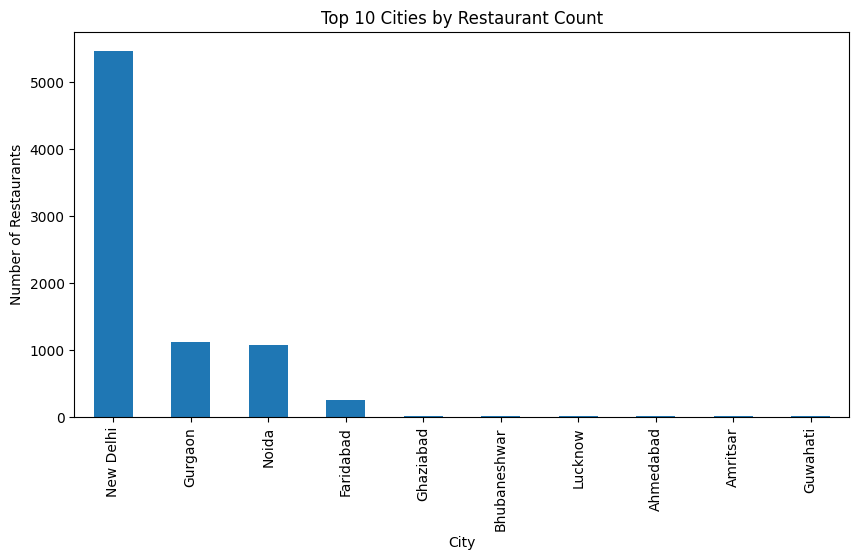

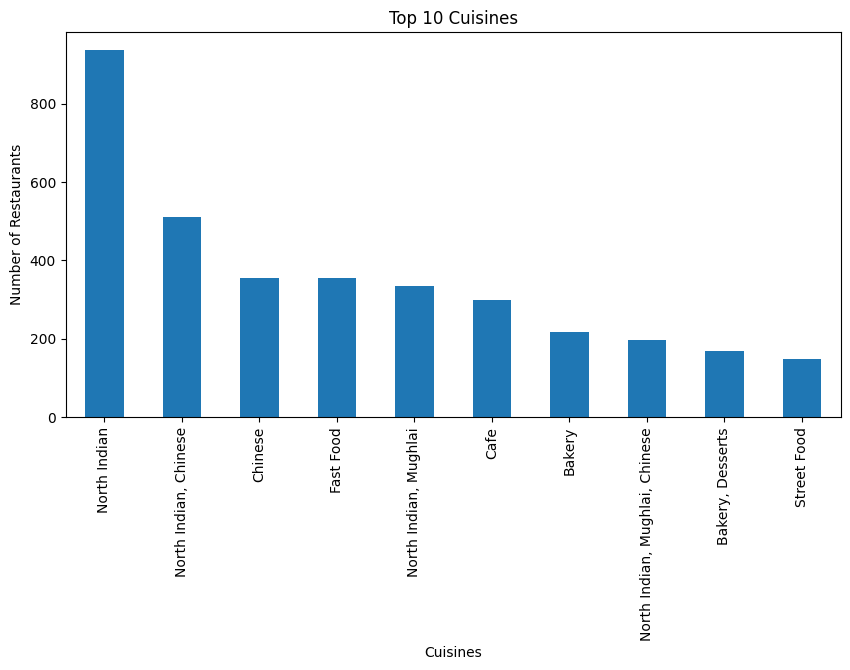

In [7]:
#task2(Descriptive Analysis)
df.describe()
#Calculate basic statistical measures
# Mean
print(df.mean(numeric_only=True))
# Median
print(df.median(numeric_only=True))
# Standard Deviation
print(df.std(numeric_only=True))
# Variance
print(df.var(numeric_only=True))
# Minimum
print(df.min(numeric_only=True))
# Maximum
print(df.max(numeric_only=True))
print("Mean rating:", df['Aggregate rating'].mean())
print("Median rating:", df['Aggregate rating'].median())
print("Std Dev of rating:", df['Aggregate rating'].std())

#Explore the distribution of categorical variables like Country Code,City and Cuisines
import pandas as pd
df = pd.read_csv("Dataset .csv")
# Count how many restaurants per country
country_counts = df["Country Code"].value_counts()
print(country_counts)
# Top cities with highest restaurant counts
city_counts = df["City"].value_counts()
print(city_counts.head(10))
# Top cuisines offered by restaurants
cuisine_counts = df["Cuisines"].value_counts()
print(cuisine_counts.head(10))

#visualization of top citiesin bar chart
import matplotlib.pyplot as plt
df["City"].value_counts().head(10).plot(kind='bar', figsize=(10,5), title='Top 10 Cities by Restaurant Count')
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.show()

#Identify the top cuisines with the highest number of restaurants.
df["Cuisines"].value_counts().head(10).plot(kind='bar', figsize=(10,5), title='Top 10 Cuisines')
plt.xlabel("Cuisines")
plt.ylabel("Number of Restaurants")
plt.show()



City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64
Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
Name: count, dtype: int64


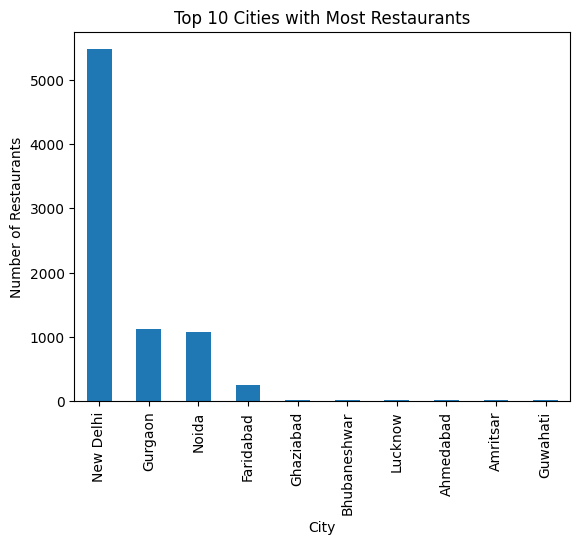

City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Secunderabad        4.500000
Lincoln             4.500000
Name: Aggregate rating, dtype: float64
Country Code
162    4.468182
208    4.300000
94     4.295238
148    4.262500
214    4.233333
189    4.210000
215    4.087500
166    4.060000
216    4.004378
191    3.870000
Name: Aggregate rating, dtype: float64


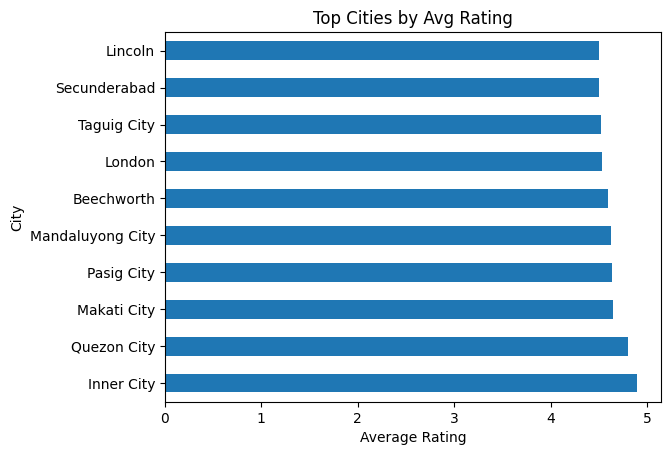

                  Country Code  Aggregate rating
Country Code          1.000000          0.282189
Aggregate rating      0.282189          1.000000


In [8]:
#task 3(Geospatial Analysis)
#Visualize the locations of restaurants on a map using latitude and longitude information.
!pip install folium
import folium
import pandas as pd
# Load dataset
df = pd.read_csv("Dataset .csv")
# Create a base map centered around average coordinates
map_center = [df["Latitude"].mean(), df["Longitude"].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=10)
# Add restaurant markers
for _, row in df.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=row["Restaurant Name"]
    ).add_to(restaurant_map)
# Save the map to an HTML file
restaurant_map.save("restaurant_map.html")
from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(restaurant_map)
for _, row in df.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=row["Restaurant Name"]).add_to(marker_cluster)
# Number of restaurants per city
city_counts = df['City'].value_counts()
print(city_counts.head(10))  # Top 10 cities
country_counts = df['Country Code'].value_counts()
print(country_counts.head(10))  # Top 10 countries
#visualisation
import matplotlib.pyplot as plt
df['City'].value_counts().head(10).plot(kind='bar', title='Top 10 Cities with Most Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.show()
#correlation
avg_rating_city = df.groupby("City")["Aggregate rating"].mean().sort_values(ascending=False)
print(avg_rating_city.head(10))
avg_rating_country = df.groupby("Country Code")["Aggregate rating"].mean().sort_values(ascending=False)
print(avg_rating_country.head(10))
avg_rating_city.head(10).plot(kind='barh', title='Top Cities by Avg Rating')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()
print(df[["Country Code", "Aggregate rating"]].corr())



